In [1]:
library(igraph)
library(data.table)
library(network)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

network: Classes for Relational Data
Version 1.13.0 created on 2015-08-31.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.


Attaching package: 'network'

The following objects are masked from 'package:igraph':

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, se

In [233]:
g = read.graph("edge_list.txt", format="ncol", directed=FALSE)
#edge_weights_list
#g = read.graph("imdb_edgelist.txt", format="ncol", directed=FALSE)


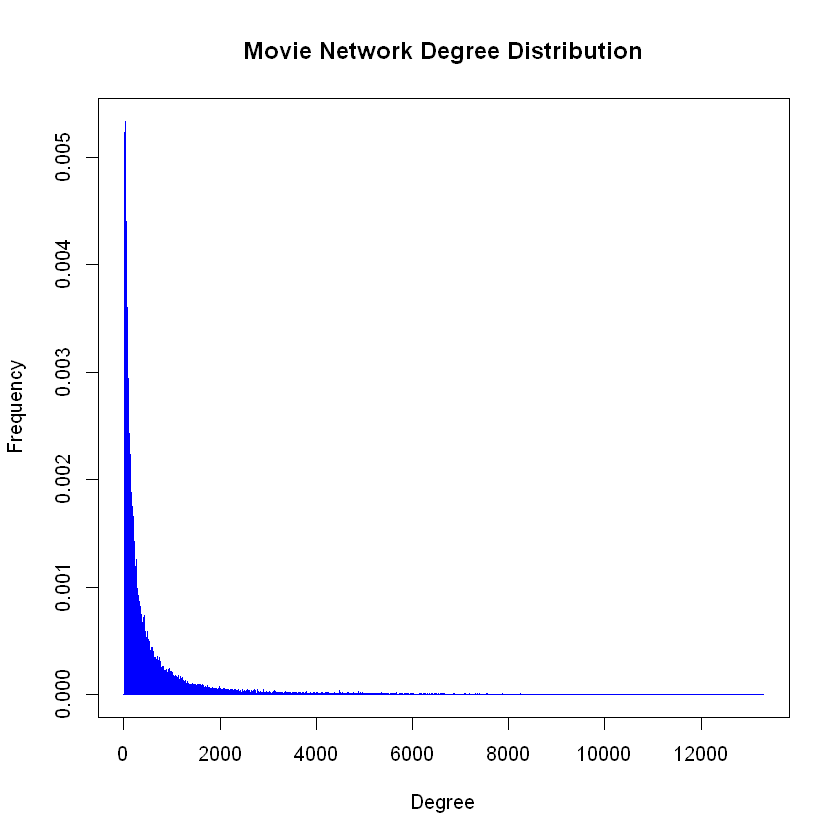

In [3]:
g = read.graph("edge_list_old.txt", format="ncol", directed=FALSE)
dd = degree.distribution(g)
plot(dd, type = "h", main = "Movie Network Degree Distribution", xlab = "Degree", ylab = "Frequency", col = "blue")

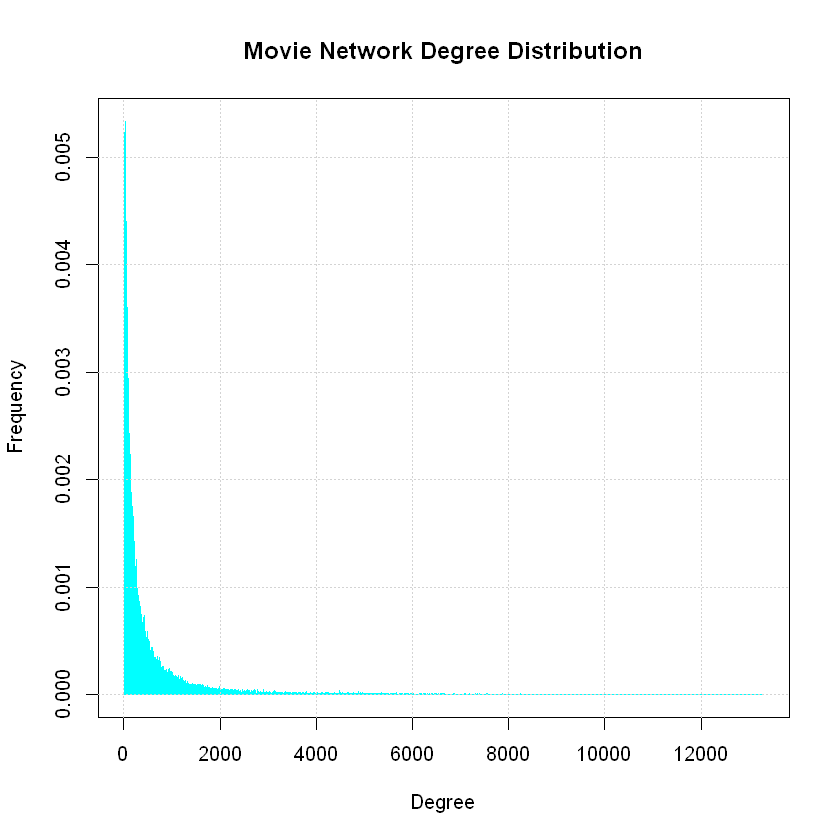

In [4]:
plot(dd, type = "h", main = "Movie Network Degree Distribution", xlab = "Degree", ylab = "Frequency", col = "cyan")
grid()

In [3]:
communities <- fastgreedy.community(g)

In [235]:
# generate genre list
print(communities)



IGRAPH clustering fast greedy, groups: 22, mod: 0.79
+ groups:
  $`1`
      [1] "19936"  "23167"  "45662"  "47806"  "57357"  "107766" "113647"
      [8] "129244" "17555"  "48660"  "102"    "116"    "974"    "992"   
     [15] "1000"   "1025"   "5510"   "6024"   "7118"   "7257"   "7723"  
     [22] "7814"   "8236"   "8391"   "8576"   "8588"   "9523"   "9527"  
     [29] "9529"   "9636"   "12499"  "12615"  "13056"  "14185"  "17518" 
     [36] "17551"  "17584"  "18111"  "19756"  "20059"  "20072"  "20112" 
     [43] "20138"  "21409"  "21609"  "21627"  "22398"  "22441"  "22503" 
     [50] "25384"  "25543"  "25929"  "26040"  "26049"  "28825"  "31038" 
     [57] "31370"  "31448"  "33503"  "33732"  "34442"  "34443"  "34776" 
  + ... omitted several groups/vertices


In [5]:
genre_data_frame = fread(input="movie_genre_1tab.txt", sep = "\t", header = FALSE)
movie_info = fread(input="id_movie_genre_rating.txt", sep = "\t", header = FALSE)

In [6]:
genre_list = c()
rating_list = c()
movie_name = ""
for (i in 1:vcount(g)){
    movie_id = V(g)$name[i]
    genre = "NA"
    rating = "NA"
    if (movie_id %in% movie_info$V1) {
        genre = movie_info$V3[which(movie_info$V1 == movie_id)]
        rating = movie_info$V4[which(movie_info$V1 == movie_id)]
    }
    genre_list = rbind(genre_list, genre)
    rating_list = rbind(rating_list, rating)
}

In [7]:
V(g)$genre = genre_list
V(g)$rating = rating_list

In [33]:
# Q7 plot 10 communities
genre_distribution = function(g, communities, com_id) {
    movie_i = (1:vcount(g))[communities$membership == com_id]
#     movie_i_genre = V(g)[movie_i]$genre[which(V(g)[movie_i]$genre != "NA")] 
    movie_i_genre = V(g)[movie_i]$genre
    table = table(movie_i_genre)
    len = length(table)
    occur_num = as.vector(table)
    occur_ratio = occur_num/sum(occur_num)
    p = occur_ratio/sum(occur_ratio)
    x = seq(1, len, by=1)
    plot(x, p, type = "o", main = sprintf("Movie Genre Distribution in Community %s", com_id), xlab = "Degree (Genre Id), Point labels are genres", ylab = "Frequency", col = "blue")
    #plot(x,p)
    text(p, labels = names(table), pos = 3, cex=0.5, font=2, col="red")
    grid()
}

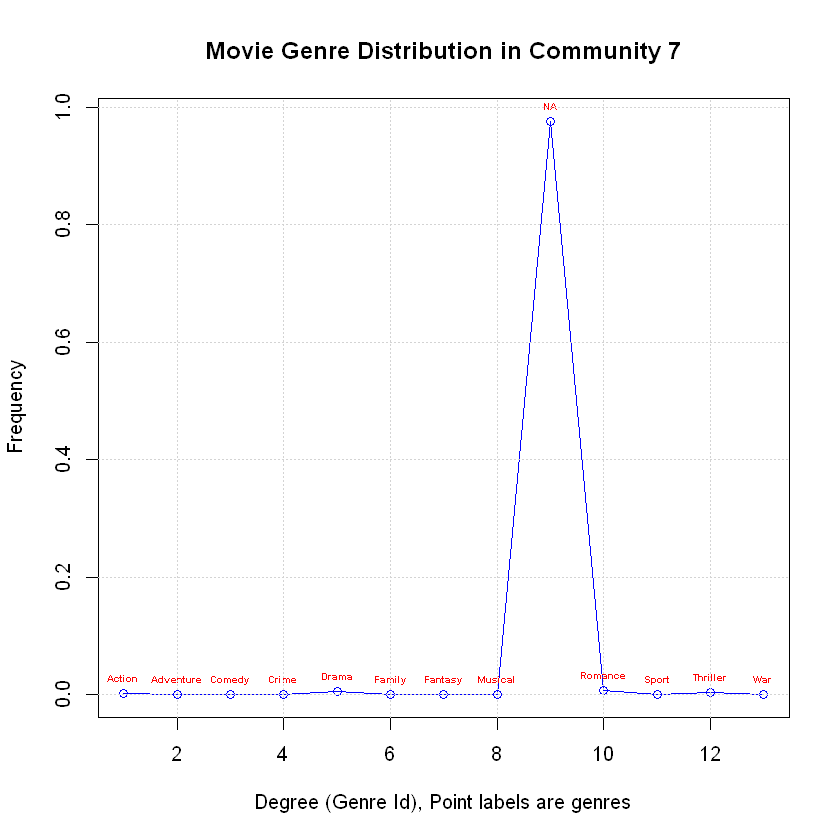

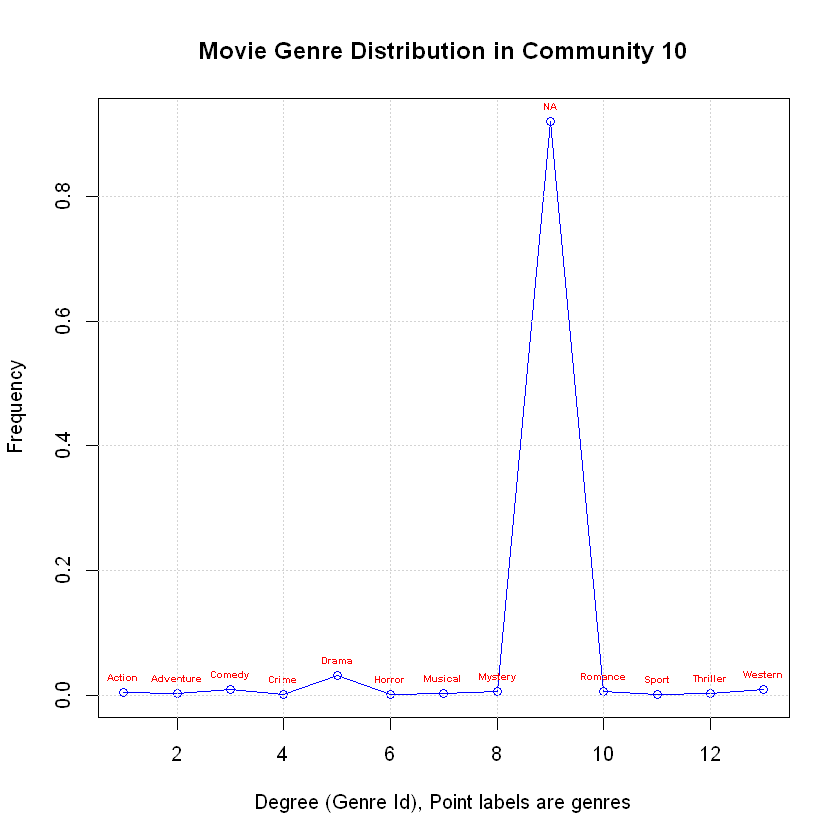

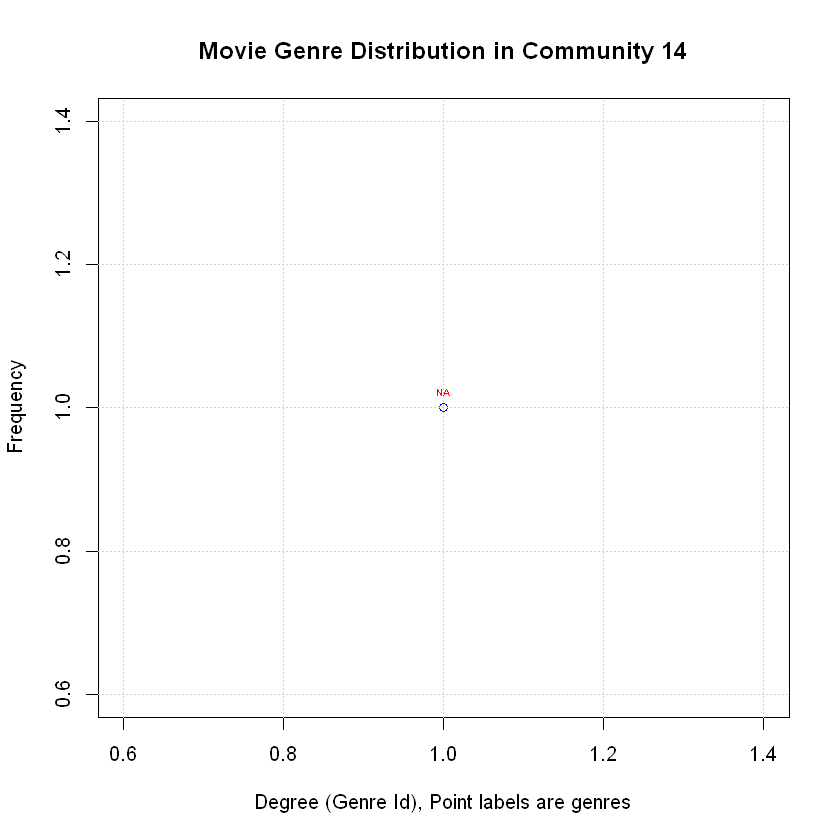

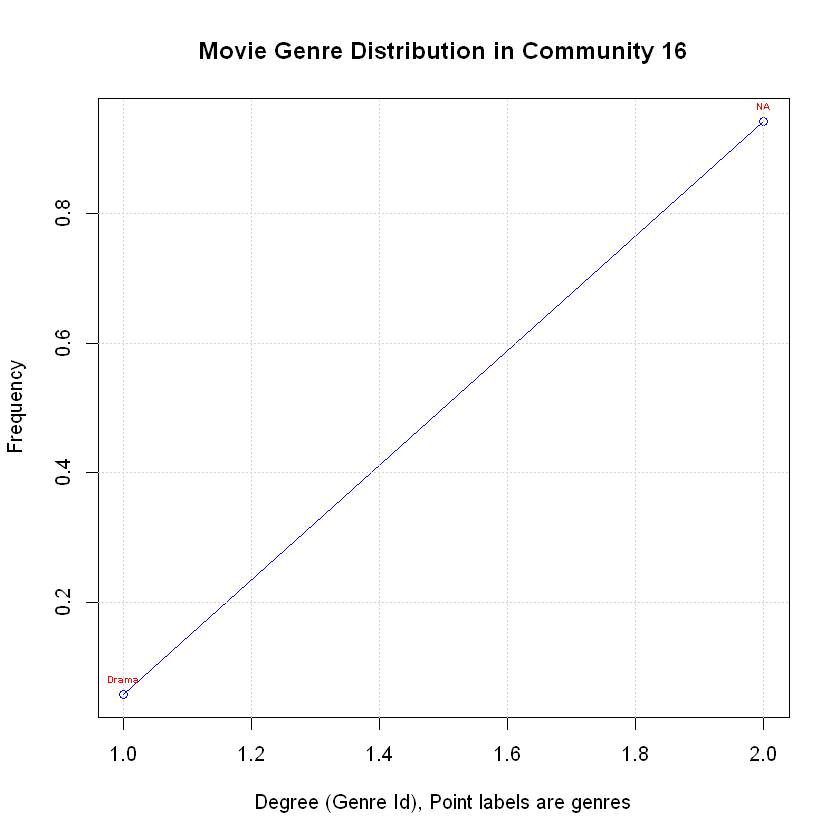

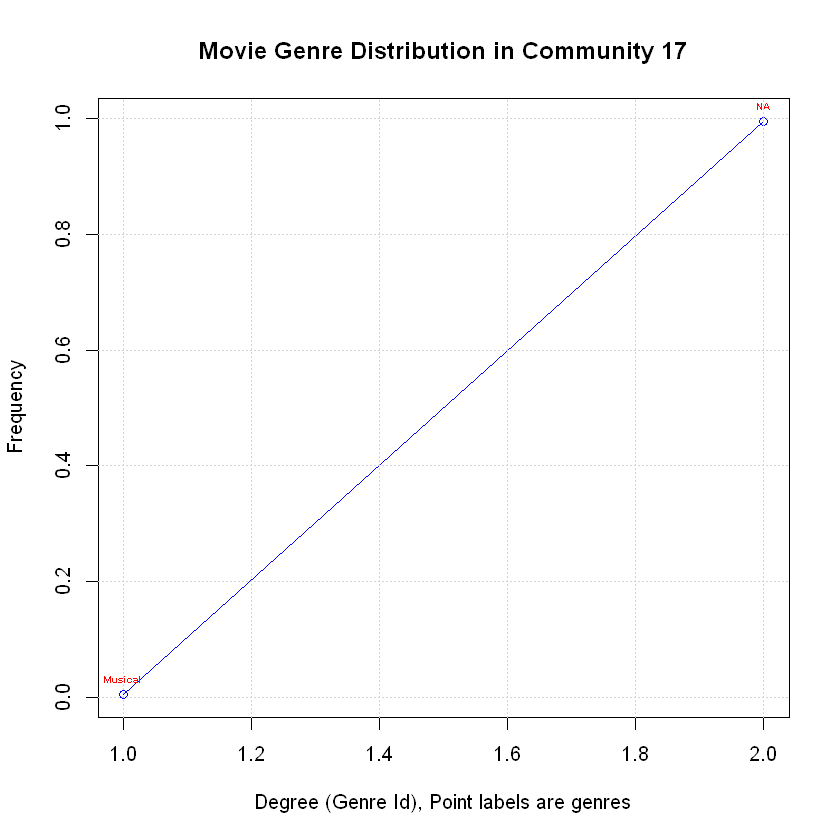

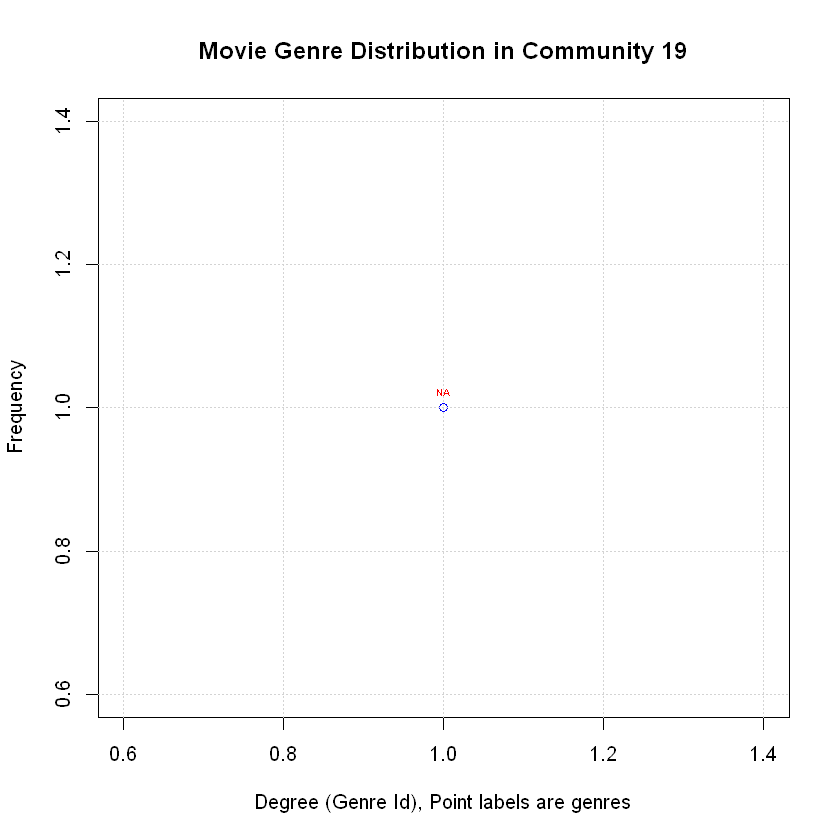

ERROR: Error in seq.default(1, len, by = 1): wrong sign in 'by' argument


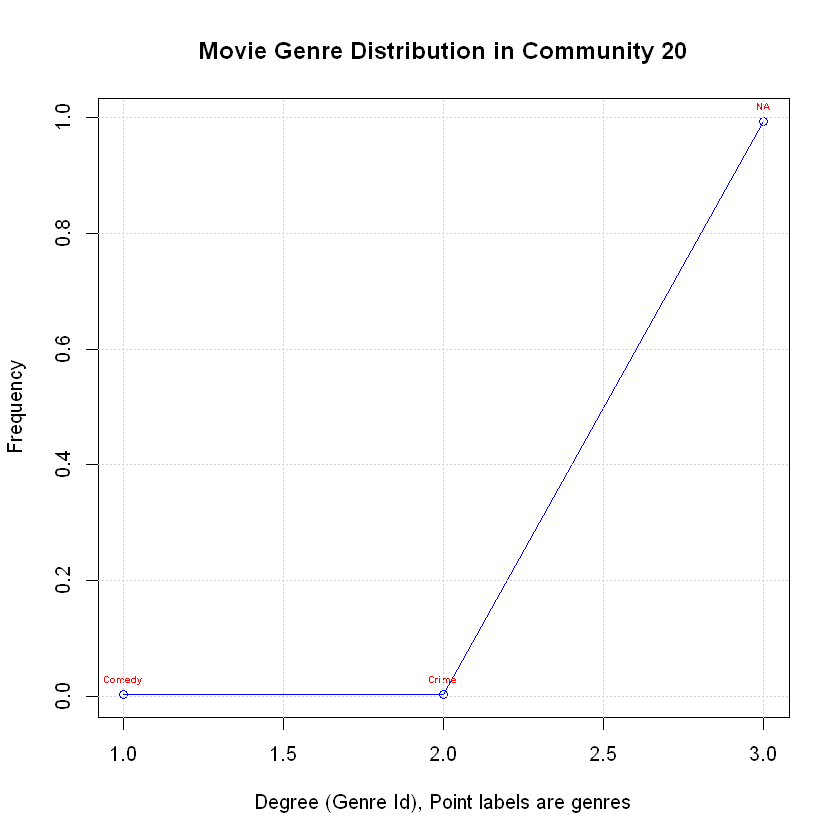

In [34]:
genre_distribution(g, communities, 7)
genre_distribution(g, communities, 10)
genre_distribution(g, communities, 14)
genre_distribution(g, communities, 16)
genre_distribution(g, communities, 17)
genre_distribution(g, communities, 19)
genre_distribution(g, communities, 20)
genre_distribution(g, communities, 23)
genre_distribution(g, communities, 26)
genre_distribution(g, communities, 27)

In [236]:
cmsize <- sizes(communities)

In [237]:
cmsize

Community sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
35145 52782 40654 12313  7595  6059 13037  9461  2140  6212  5728  1419  3288 
   14    15    16    17    18    19    20    21    22 
  400  2154    69   616  3502    24   680    12    14 

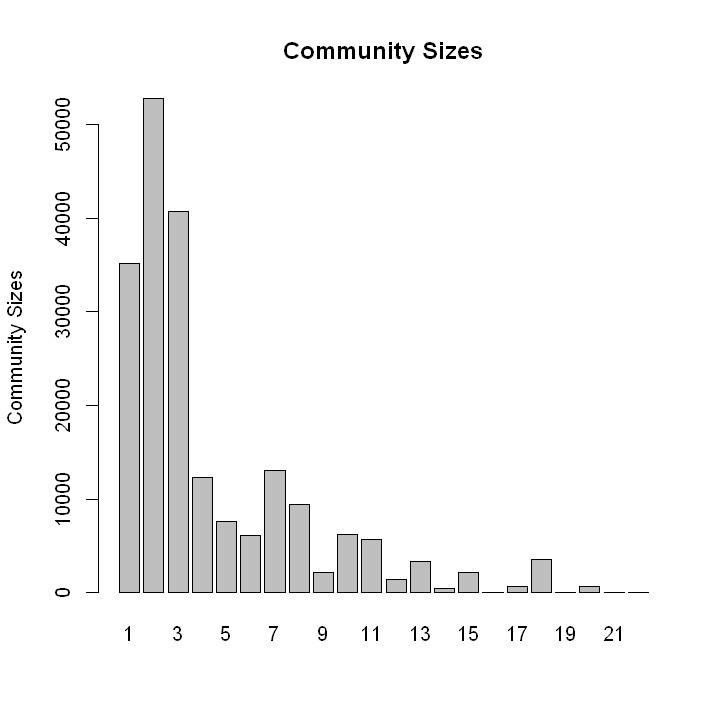

In [41]:
library(repr)

options(repr.plot.width=6,repr.plot.height=6)
barplot(cmsize,main="Community Sizes",ylab="Community Sizes",names.arg=1:length(cmsize))

In [47]:
comm=strtoi(communities[[22]])

In [253]:
comm[2]

[1] 42871

In [50]:
library(data.table)
movie_genre = fread("movie_genre_map.txt", sep = "\t", header = FALSE)
head(movie_genre)

V1    V2         
1 25367 Musical    
2 34974 Documentary
3  6532 War        
4 31422 Mystery    
5 44068 Drama      
6  7126 Family

In [52]:
setkey(movie_genre, V1)
genre_list <-sort(unique(movie_genre$V2))
genre_list
comm=strtoi(communities[[22]])
element <- movie_genre[movie_genre$V1 %in% comm]

[1] "Action"      "Adult"       "Adventure"   "Animation"   "Biography"  
 [6] "Comedy"      "Crime"       "Documentary" "Drama"       "Family"     
[11] "Fantasy"     "Film-Noir"   "Game-Show"   "History"     "Horror"     
[16] "Music"       "Musical"     "Mystery"     "News"        "Reality-TV" 
[21] "Romance"     "Sci-Fi"      "Short"       "Sport"       "Talk-Show"  
[26] "Thriller"    "War"         "Western"

In [53]:
element

V1    V2     
1 42871 Comedy 
2 42872 Romance
3 42873 Romance
4 42874 Drama  
5 42877 Comedy 
6 42878 Comedy 
7 42879 Drama  
8 42880 Drama  
9 42881 Romance

In [161]:
comm=strtoi(communities[[22]])

In [167]:
comm[2]

[1] 42871

Warning message in title(xlab = "Movie Genre", mgp = c(5, 1, 0), family = "Calibri Light", :
"font family not found in Windows font database"

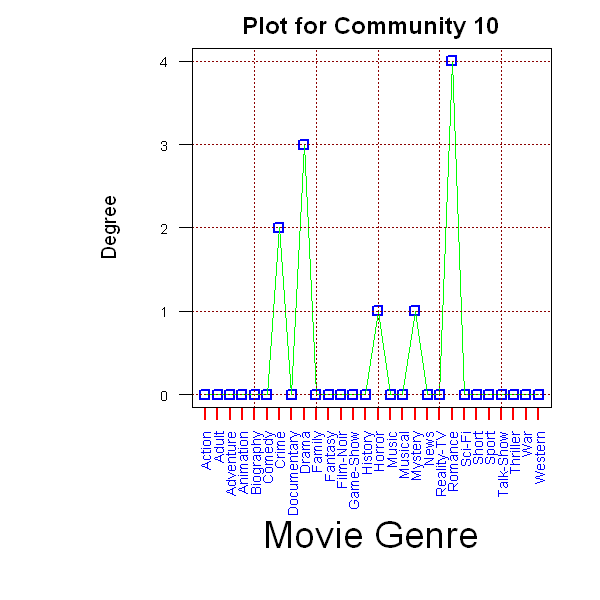

In [254]:
comm=strtoi(communities[[21]])
d ={}
d[genre_list]<-as.integer(0)
    #f=strtoi(unlist(comm))
    element <- movie_genre[movie_genre$V1 %in% comm]
    

    for (j in 1:nrow(element)){
    if(!(is.na(element[j]$V2))){
        

    d[element[j]$V2]<-d[element[j]$V2]+as.integer(1)   
    
    
    } 
    }  
#dev.on()
par(mar=c(8,8,2,2),cex.axis=0.7, las=2)
 #png(file=paste(cy,"png",sep="."))
plot(d, xaxt="n",xlab="", ylab="Degree", main="Plot for Community 10",col = "blue",pch=0,lwd = 2)
grid(col="dark red")
colors = c("red", "yellow", "green", "violet", "orange", "blue", "pink", "cyan") 
axis(side = 1,at <-c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28), labels = genre_list,
    lwd.ticks=2,col.ticks=colors,col.lab="black",font.axis=1,,col.axis="blue")
lines(d,col='green')

title(xlab="Movie Genre", mgp=c(5,1,0), family="Calibri Light",cex.lab=1.9,cex.axis=1.05 )

grid(col="dark red")
box()

In [180]:
comm=strtoi(communities[[22]])
element <- movie_genre[movie_genre$V1 %in% comm]
element

V1    V2     
1 42871 Comedy 
2 42872 Romance
3 42873 Romance
4 42874 Drama  
5 42877 Comedy 
6 42878 Comedy 
7 42879 Drama  
8 42880 Drama  
9 42881 Romance

In [186]:
ecount(g)

[1] 42889798

In [187]:
library(data.table)
movie_genre = fread("movie_genre_map.txt", sep = "\t", header = FALSE)

In [188]:
head(movie_genre)

V1    V2         
1 25367 Musical    
2 34974 Documentary
3  6532 War        
4 31422 Mystery    
5 44068 Drama      
6  7126 Family

In [189]:
f = c(15520 ,166)

In [190]:
movie_genre$V2[movie_genre$V1 ==166]

[1] "Crime"

In [191]:
movie_genre$V2[movie_genre$V1 %in% f ]

[1] "Crime" "Crime"

In [192]:
typeof(movie_genre)

[1] "list"

In [193]:
genre_list <-unique(sort(movie_genre$V2))

In [194]:
genre_list

[1] "Action"      "Adult"       "Adventure"   "Animation"   "Biography"  
 [6] "Comedy"      "Crime"       "Documentary" "Drama"       "Family"     
[11] "Fantasy"     "Film-Noir"   "Game-Show"   "History"     "Horror"     
[16] "Music"       "Musical"     "Mystery"     "News"        "Reality-TV" 
[21] "Romance"     "Sci-Fi"      "Short"       "Sport"       "Talk-Show"  
[26] "Thriller"    "War"         "Western"

In [197]:
#8a
#Most dominant genre
#
d ={}
max_genre_list<-seq(0,0,31)
max_genre <-seq(0,0,31)
genre_list=sort(unique(movie_genre$V2))

for (i in 1:31){
    
    #comm=which(fg$membership==cy[i])
    comm=communities[i]
    cat("*****for ", i,"\n")
    
    d[genre_list]<-as.integer(0)
    f=strtoi(unlist(comm))
    element <- movie_genre[movie_genre$V1 %in% f]
    

    for (j in 1:nrow(element)){
    if(!(is.na(element[j]$V2))){
        

    d[element[j]$V2]<-d[element[j]$V2]+as.integer(1)   
    
    
    } 
    }  
   print(which.max(d))
    print(max(d))
    print(d)
    max_genre_freq[i] <- max(ans)
    max_gf[i] <- which.max(ans)
    
}

*****for  1 
Drama 
    9 
[1] 2058
     Action       Adult   Adventure   Animation   Biography      Comedy 
         73          96          47          14           6        1322 
      Crime Documentary       Drama      Family     Fantasy   Film-Noir 
        111          87        2058         179         134          26 
  Game-Show     History      Horror       Music     Musical     Mystery 
          1          73         126          93         258         152 
       News  Reality-TV     Romance      Sci-Fi       Short       Sport 
          2           0        1342         148         283          87 
  Talk-Show    Thriller         War     Western 
          0         721         186         122 


ERROR: Error in eval(expr, envir, enclos): object 'ans' not found


In [198]:
#8b
#finding fraction of movies belonging to each genre in the entire dataset
gen_mov <-{}
gen_mov[genre_list] <- 0
#now loop through entire movie_genre, and increment count
for (j in 1:nrow(movie_genre)){
    gen_mov[movie_genre[j]$V2]<-gen_mov[movie_genre[j]$V2]+as.integer(1)  
    }

In [199]:
gen_mov

Action       Adult   Adventure   Animation   Biography      Comedy 
        401         968         286         100          29        7929 
      Crime Documentary       Drama      Family     Fantasy   Film-Noir 
        700         418       12529        1012         928         114 
  Game-Show     History      Horror       Music     Musical     Mystery 
          2         461         892         544        1417         921 
       News  Reality-TV     Romance      Sci-Fi       Short       Sport 
         11           1        7566         973        1774         402 
  Talk-Show    Thriller         War     Western 
          1        4364        1138         656

In [200]:
sum(gen_mov)

[1] 46537

In [202]:
#8b
#Most dominant genre
d ={}
max_genre_list<-seq(0,0,31)
max_genre <-seq(0,0,31)
genre_list=sort(unique(movie_genre$V2))
ans <- seq(0,0,length.out=28)
for (k in 1:31){
    comm=communities[k]
    cat("*****for ", k,"\n")
    d[genre_list]<-as.integer(0)
    
    
    f=strtoi(unlist(comm))
    element <- movie_genre[movie_genre$V1 %in% f]
    

    for (j in 1:nrow(element)){
    if(!(is.na(element[j]$V2))){
        

    d[element[j]$V2]<-d[element[j]$V2]+as.integer(1)   
    
    
    } 
    } 
    
    
    ans <- seq(0,0,length.out=28)
    for(i in 1:length(d)){
        #cat("for",d[i],"\n")
        if(d[i]==0)
        next
        
        fraq_g <- as.double(d[i]/sum(d))
        global_g<-as.double(gen_mov[genre_list[i]]/sum(gen_mov))
        #print(gen_mov[genre_list[i]])
        ans[i] <- log(d[i])* as.double(fraq_g/global_g)
        #cat(c_i,"\t",fraq_g,"\t",global_g,"\t",ans[i],"\n")
            print(ans[i])
    }
    max_genre_list[k] <- max(ans)
    max_genre[k] <- which.max(ans)
       #break 

}

*****for  1 
[1] 4.691882
[1] 2.719189
[1] 3.800791
[1] 2.219431
[1] 2.226885
[1] 7.198127
[1] 4.486083
[1] 5.583642
[1] 7.528168
[1] 5.511704
[1] 4.248408
[1] 4.463723
[1] 0
[1] 4.081225
[1] 4.103762
[1] 4.654749
[1] 6.073502
[1] 4.980674
[1] 0.7570553
[1] 7.673599
[1] 4.566059
[1] 5.409984
[1] 5.805877
[1] 6.531056
[1] 5.130786
[1] 5.366927
*****for  2 
[1] 4.855488
[1] 3.839322
[1] 4.376937
[1] 2.485899
[1] 0.5050042
[1] 7.627775
[1] 5.620223
[1] 5.254884
[1] 8.21568
[1] 5.014133
[1] 5.346341
[1] 2.973
[1] 0
[1] 4.764733
[1] 5.752105
[1] 5.025196
[1] 5.640047
[1] 5.663294
[1] 3.250714
[1] 0
[1] 7.401798
[1] 4.868073
[1] 4.521945
[1] 3.69711
[1] 6.896896
[1] 6.264306
[1] 4.726492
*****for  3 
[1] 4.100164
[1] 7.645649
[1] 4.010823
[1] 3.048505
[1] 1.661851
[1] 7.244862
[1] 4.278744
[1] 4.639678
[1] 8.121687
[1] 6.404424
[1] 4.846095
[1] 3.164452
[1] 4.369388
[1] 5.611406
[1] 4.449334
[1] 5.328694
[1] 4.913372
[1] 0.5649655
[1] 7.15322
[1] 4.853179
[1] 7.397987
[1] 4.516165
[1] 0
[1] 

ERROR: Error in if (!(is.na(element[j]$V2))) {: argument is of length zero


In [211]:
nodeset1=which(communities$membership==22)

In [212]:
nodeset1

[1] 202932 202983 202984 202985 202986 202987 202988 202989 202990 202991
[11] 202992 202993 202995 202996

In [213]:
library(data.table)
movie_actor_map = fread("movie_actor_map_30.txt", sep = "\t", header = FALSE)

In [214]:
nodeset1 <- unique(movie_actor_map$V1)

In [215]:
nodeset2 <- unique(movie_actor_map$V2)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

 [1] "Antaki, Joseph"                 "Beaulac, Sebastien"            
 [3] "Boucher-L'Écuyer, Émile Pascal" "Gagné, David"                  
 [5] "Priest, Benoit"                 "Primeau, Marc"                 
 [7] "Bourassa-Simpson, Mathieu"      "Desjardins, Nick"              
 [9] "Fortin, Samuel (I)"             "Lafond-Martel, Olivier"        
[11] "Legros, Simon (I)"              "Charlebois, Jessica"           
[13] "Valin, Andréanne"               "Guimont, Mélanie"              
[15] "Riel-Dery, Jessica"             "Leonard, Joshua"               
[17] "Williams, Michael C."           "Donahue, Heather (I)"          


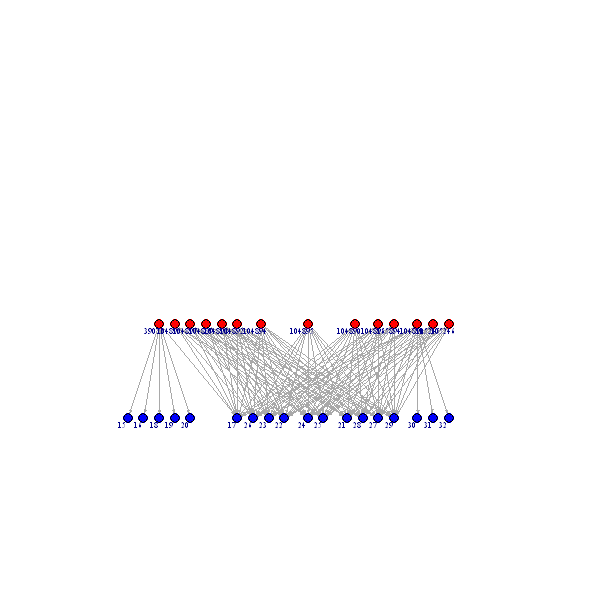

In [274]:
# Q8 (c)
edgelist = fread(input="8c_movie_actor.txt", sep = "\t", header = FALSE)
g1 <- graph.data.frame(edgelist)
col <- c("red","blue")
V(g1)$type <- is.na(as.numeric(V(g1)$name))
names = V(g1)$name
V(g1)[1:14]$label <- names[1:14]
V(g1)[15:32]$label <- c(15:32)
print(names[15:32])
plot(g1, layout = layout_as_bipartite(g1,types = NULL,hgap=0.3,vgap=1.8), 
     vertex.color = col[as.numeric(V(g1)$type)+1], 
     vertex.size=20, vertex.label.dist=-2, rescale=FALSE, 
     vertex.label.cex=0.4, xlim=c(-1,7), ylim=c(1,4), 
     edge.width=0.3, edge.arrow.size=0.2,
    )


In [226]:
movie_i = (1:vcount(g))[communities$membership == 24]
id_list = V(g)[movie_i]$name
name_list = c()
for (id in id_list){
    if (id %in% movie_info$V1) {
        name = movie_info$V2[which(movie_info$V1 == id)]
    }
    name_list = rbind(name_list, name)
}
print(id_list)
print(name_list)

character(0)
NULL


In [228]:
for (i in 1:length(sizes(communities))) {
    print(sprintf("The most frequent dominant genre across community %s is %s (%s)", i, genres[[i]], occur[[i]] ))
}

[1] "The most frequent dominant genre across community 1 is NA (5100)"
[1] "The most frequent dominant genre across community 2 is NA (9249)"
[1] "The most frequent dominant genre across community 3 is NA (5859)"
[1] "The most frequent dominant genre across community 4 is NA (2848)"
[1] "The most frequent dominant genre across community 5 is NA (1705)"
[1] "The most frequent dominant genre across community 6 is NA (1849)"
[1] "The most frequent dominant genre across community 7 is NA (2922)"
[1] "The most frequent dominant genre across community 8 is NA (5807)"
[1] "The most frequent dominant genre across community 9 is NA (295)"
[1] "The most frequent dominant genre across community 10 is NA (608)"
[1] "The most frequent dominant genre across community 11 is NA (871)"
[1] "The most frequent dominant genre across community 12 is NA (189)"
[1] "The most frequent dominant genre across community 13 is NA (1119)"
[1] "The most frequent dominant genre across community 14 is NA (133)"
[1] "T

In [280]:
movie_i = (1:vcount(g))[communities$membership == 21]
id_list = V(g)[movie_i]$name
name_list = c()
for (id in id_list){
    if (id %in% movie_info$V1) {
        name = movie_info$V2[which(movie_info$V1 == id)]
    }
    name_list = rbind(name_list, name)
}
print(id_list)
print(name_list)

 [1] "83384" "21601" "50691" "55328" "62385" "75924" "78336" "8595"  "26088"
[10] "27909" "32549" "87985"
     [,1]                                                 
name "A Lucky Disappointment (1914)"                      
name "One Hour to Live (1939)"                            
name "Liebesschule (1940)"                                
name "Der Theaterprinz (1917)"                            
name "Lakh Pardesi Hoiye (2008)"                          
name "Little Horribles (2013)"                            
name "This Is My Love (1954)"                             
name "Darla (2011)"                                       
name "The Unbelievers (2013)"                             
name "Stop, Look and Love (1939)"                         
name "Agni Pankh (2004)"                                  
name "O Mädchen, mein Mädchen, wie lieb' ich Dich! (1930)"


Warning message in is.na(V(g)$rating[i]):
"is.na() applied to non-(list or vector) of type 'NULL'"

ERROR: Error in if (is.na(V(g)$rating[i])) {: argument is of length zero
